In [1]:
import warnings as wr
wr.filterwarnings("ignore") # unnecessary item not show
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Height-Weight Data.csv") # csv file import 

In [3]:
df.head() # csv file first 5 item show

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.info() #csv file informetion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


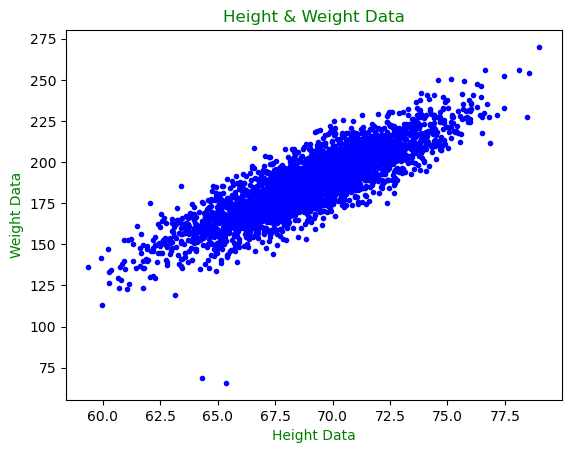

In [5]:
plt.scatter(df.Height,df.Weight,color = "blue",marker= ".") # Height & Weight graph show
# x axis to height
# y axis to weight
plt.title("Height & Weight Data",color = "green") #graph title
plt.xlabel("Height Data",color = "green")#graph  x axis to title
plt.ylabel("Weight Data",color = "green")#graph y axis to title
plt.savefig("img1.png")# graph png file download

In [6]:
df.Height.mean()# Height average

69.02441087268797

In [7]:
df.Weight.mean()# Weight average

186.89125797946284

In [8]:
x = df[["Height"]]# Height 2 dimensional array

In [9]:
x.head()# csv file Height 2 dimensional column 5 item show

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [10]:
y = df[["Weight"]]#Weight 2 dimensional array

In [11]:
y.head()# csv file Weight 2 dimensional column 5 item show

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(df[["Height"]],df[["Weight"]],test_size=0.30,random_state= 1) # separate to training and testing data

In [14]:
xtrain.head()#separate to training data Height 2 dimensional column 5 item show
xtrain.to_csv("train_x_axcis.csv")#separate to training data Height 2 dimensional column download csv file

In [15]:
ytrain.head()#separate to testing data weight 2 dimensional column 5 item show
ytrain.to_csv("train_y_axcis.csv")#separate to testing data weight 2 dimensional column download csv file

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression() #Creating object for LinearRegression 

In [18]:
reg.fit(xtrain,ytrain) #training and testing data the model

LinearRegression()

In [19]:
reg.coef_ #m

array([[5.97744946]])

In [20]:
reg.intercept_ #c

array([-225.82603001])

In [21]:
reg.predict(xtest) # all number prediction


array([[177.07092663],
       [189.9655512 ],
       [167.54939263],
       ...,
       [209.55755027],
       [178.6987462 ],
       [204.84854541]])

In [22]:
reg.score(xtest,ytest)# testing accuracy

0.7313258168853622

In [23]:
reg.score(xtrain,ytrain)# training accuracy

0.7327243206606744

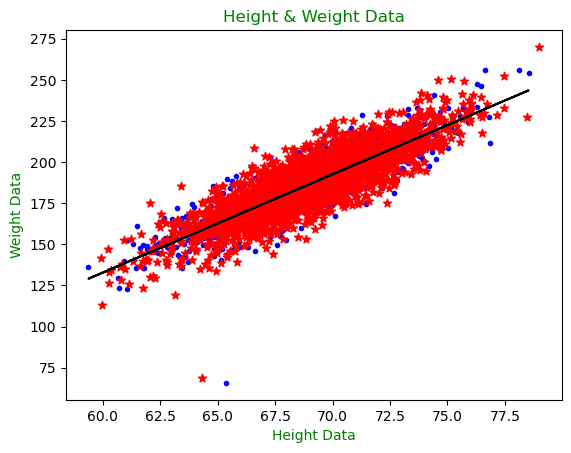

In [24]:
plt.plot(xtest,reg.predict(xtest),color = "black")#bast feet line show to graph
plt.scatter(xtest,ytest,color = "blue",marker= ".")# testing data graph show
plt.scatter(xtrain,ytrain,color = "red",marker= "*")# training data graph show
plt.title("Height & Weight Data",color = "green")#graph title
plt.xlabel("Height Data",color = "green")#graph  x axis to title
plt.ylabel("Weight Data",color = "green")#graph y axis to title
plt.savefig("img2.png")# graph png file download

In [25]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [26]:
mean_squared_error(ytest,reg.predict(xtest)) # actual - predicted

110.89221516932378

In [27]:
mean_absolute_error(ytest,reg.predict(xtest))# actual - predicted

8.279688660993672

In [28]:
import pickle as pk # save ml models 

In [29]:
pk.dump(reg,open("Linear Regression_01","wb")) # write binary

In [30]:
reg2 = pk.load(open("Linear Regression_01","rb"))#save ml models read  binary

In [31]:
reg2.predict([[50]])

array([[73.04644308]])